<a href="https://colab.research.google.com/github/AfsanaBrishty/Machine-Learning-and-Deep-Learning-with-Python/blob/main/Decision_Tree_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Github Link:
https://github.com/AfsanaBrishty/Machine-Learning-and-Deep-Learning-with-Python/blob/main/Decision_Tree_and_Random_Forest.ipynb

In [77]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline


In [78]:
df = pd.read_csv("JSVulnerabilityDataSet-1.0.csv")
df.head()

,name,longname,path,full_repo_path,line,column,endline,endcolumn,CC,CCL,CCO,CI,CLC,CLLC,McCC,NL,NLE,CD,CLOC,DLOC,TCD,TCLOC,LLOC,LOC,NOS,NUMPAR,TLLOC,TLOC,TNOS,HOR_D,HOR_T,HON_D,HON_T,HLEN,HVOC,HDIFF,HVOL,HEFF,HBUGS,HTIME,CYCL,PARAMS,CYCL_DENS,Vuln
0,initFileServer,initializers.initFileServer.initFileServer,initializers/initFileServer.js,https://github.com/actionhero/actionhero/blob/...,4,21,128,1,0.0,0,0,0,0.0,0,3,1,1,0.000000,0,0,0.008621,1,18,25,10,2,115,125,83,7,37,14,41,78,21,10.250000,342.600759,3511.657780,0.114200,195.092099,3,2,30.0,1
1,api.sendFile,initializers.initFileServer.initFileServer.sen...,initializers/initFileServer.js,https://github.com/actionhero/actionhero/blob/...,15,16,40,2,0.0,0,0,0,0.0,0,11,3,3,0.041667,1,0,0.041667,1,23,26,22,3,23,26,22,16,74,32,86,160,48,21.500000,893.594000,19212.271002,0.297865,1067.348389,9,3,37.5,1
2,<anonymous>.followFileToServe,initializers.initFileServer.initFileServer.fol...,initializers/initFileServer.js,https://github.com/actionhero/actionhero/blob/...,42,36,65,2,0.0,0,0,0,0.0,0,1,0,0,0.000000,0,0,0.000000,0,4,4,1,4,24,24,15,3,4,7,9,13,10,1.928571,43.185065,83.285483,0.014395,4.626971,1,4,100.0,1
3,<anonymous>.sendFile,initializers.initFileServer.initFileServer.sen...,initializers/initFileServer.js,https://github.com/actionhero/actionhero/blob/...,67,27,110,2,0.0,0,0,0,0.0,0,1,0,0,0.000000,0,0,0.000000,0,4,4,1,4,44,44,27,3,4,7,9,13,10,1.928571,43.185065,83.285483,0.014395,4.626971,1,4,100.0,0
4,<anonymous>.sendFileNotFound,initializers.initFileServer.initFileServer.sen...,initializers/initFileServer.js,https://github.com/actionhero/actionhero/blob/...,112,35,125,2,0.0,0,0,0,0.0,0,3,2,2,0.000000,0,0,0.000000,0,14,14,9,3,14,14,9,10,33,27,47,80,37,8.703704,416.756269,3627.323084,0.138919,201.517949,3,3,30.0,0


In [79]:
df1=df.drop(['name','longname','path','full_repo_path','line','column','endline','endcolumn'],axis='columns')
df1

,CC,CCL,CCO,CI,CLC,CLLC,McCC,NL,NLE,CD,CLOC,DLOC,TCD,TCLOC,LLOC,LOC,NOS,NUMPAR,TLLOC,TLOC,TNOS,HOR_D,HOR_T,HON_D,HON_T,HLEN,HVOC,HDIFF,HVOL,HEFF,HBUGS,HTIME,CYCL,PARAMS,CYCL_DENS,Vuln
0,0.0,0,0,0,0.0,0,3,1,1,0.000000,0,0,0.008621,1,18,25,10,2,115,125,83,7,37,14,41,78,21,10.250000,342.600759,3511.657780,0.114200,195.092099,3,2,30.000000,1
1,0.0,0,0,0,0.0,0,11,3,3,0.041667,1,0,0.041667,1,23,26,22,3,23,26,22,16,74,32,86,160,48,21.500000,893.594000,19212.271002,0.297865,1067.348389,9,3,37.500000,1
2,0.0,0,0,0,0.0,0,1,0,0,0.000000,0,0,0.000000,0,4,4,1,4,24,24,15,3,4,7,9,13,10,1.928571,43.185065,83.285483,0.014395,4.626971,1,4,100.000000,1
3,0.0,0,0,0,0.0,0,1,0,0,0.000000,0,0,0.000000,0,4,4,1,4,44,44,27,3,4,7,9,13,10,1.928571,43.185065,83.285483,0.014395,4.626971,1,4,100.000000,0
4,0.0,0,0,0,0.0,0,3,2,2,0.000000,0,0,0.000000,0,14,14,9,3,14,14,9,10,33,27,47,80,37,8.703704,416.756269,3627.323084,0.138919,201.517949,3,3,30.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12120,0.0,0,0,0,0.0,0,2,0,0,0.000000,0,0,0.137931,8,5,7,2,2,50,80,31,7,10,12,17,27,19,4.958333,114.694043,568.691296,0.038231,31.593961,2,2,66.666667,0
12121,0.0,0,0,0,0.0,0,1,0,0,0.250000,1,0,0.250000,1,3,4,1,0,3,4,1,3,4,3,3,7,6,1.500000,18.094738,27.142106,0.006032,1.507895,1,0,100.000000,0
12122,0.0,0,0,0,0.0,0,11,2,2,0.135135,5,0,0.145455,8,32,48,18,1,47,75,29,15,74,40,79,153,55,14.812500,884.548036,13102.367786,0.294849,727.909321,8,1,40.000000,0
12123,0.0,0,0,0,0.0,0,2,1,1,0.000000,0,0,0.000000,0,6,8,3,1,6,8,3,5,7,4,6,13,9,3.750000,41.209025,154.533844,0.013736,8.585214,2,1,66.666667,0


Dropping name,longname,path,full_repo_path,line,column,endline,endcolumn,Vuln columns.
Vuln is the target.

In [80]:
inputs = df.drop(['name','longname','path','full_repo_path','line','column','endline','endcolumn','Vuln'],axis='columns')
target = df['Vuln']

In [81]:
inputs

,CC,CCL,CCO,CI,CLC,CLLC,McCC,NL,NLE,CD,CLOC,DLOC,TCD,TCLOC,LLOC,LOC,NOS,NUMPAR,TLLOC,TLOC,TNOS,HOR_D,HOR_T,HON_D,HON_T,HLEN,HVOC,HDIFF,HVOL,HEFF,HBUGS,HTIME,CYCL,PARAMS,CYCL_DENS
0,0.0,0,0,0,0.0,0,3,1,1,0.000000,0,0,0.008621,1,18,25,10,2,115,125,83,7,37,14,41,78,21,10.250000,342.600759,3511.657780,0.114200,195.092099,3,2,30.000000
1,0.0,0,0,0,0.0,0,11,3,3,0.041667,1,0,0.041667,1,23,26,22,3,23,26,22,16,74,32,86,160,48,21.500000,893.594000,19212.271002,0.297865,1067.348389,9,3,37.500000
2,0.0,0,0,0,0.0,0,1,0,0,0.000000,0,0,0.000000,0,4,4,1,4,24,24,15,3,4,7,9,13,10,1.928571,43.185065,83.285483,0.014395,4.626971,1,4,100.000000
3,0.0,0,0,0,0.0,0,1,0,0,0.000000,0,0,0.000000,0,4,4,1,4,44,44,27,3,4,7,9,13,10,1.928571,43.185065,83.285483,0.014395,4.626971,1,4,100.000000
4,0.0,0,0,0,0.0,0,3,2,2,0.000000,0,0,0.000000,0,14,14,9,3,14,14,9,10,33,27,47,80,37,8.703704,416.756269,3627.323084,0.138919,201.517949,3,3,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12120,0.0,0,0,0,0.0,0,2,0,0,0.000000,0,0,0.137931,8,5,7,2,2,50,80,31,7,10,12,17,27,19,4.958333,114.694043,568.691296,0.038231,31.593961,2,2,66.666667
12121,0.0,0,0,0,0.0,0,1,0,0,0.250000,1,0,0.250000,1,3,4,1,0,3,4,1,3,4,3,3,7,6,1.500000,18.094738,27.142106,0.006032,1.507895,1,0,100.000000
12122,0.0,0,0,0,0.0,0,11,2,2,0.135135,5,0,0.145455,8,32,48,18,1,47,75,29,15,74,40,79,153,55,14.812500,884.548036,13102.367786,0.294849,727.909321,8,1,40.000000
12123,0.0,0,0,0,0.0,0,2,1,1,0.000000,0,0,0.000000,0,6,8,3,1,6,8,3,5,7,4,6,13,9,3.750000,41.209025,154.533844,0.013736,8.585214,2,1,66.666667


In [82]:
target

0        1
1        1
2        1
3        0
4        0
        ..
12120    0
12121    0
12122    0
12123    0
12124    0
Name: Vuln, Length: 12125, dtype: int64

MinMaxScalar for normalization.

In [83]:
from sklearn.preprocessing import MinMaxScaler 

In [84]:
scaling = MinMaxScaler()

In [85]:
inputs_n = scaling.fit_transform(inputs)
inputs_n

array([[0.        , 0.        , 0.        , ..., 0.01666667, 0.15384615,
        0.03333333],
       [0.        , 0.        , 0.        , ..., 0.06666667, 0.23076923,
        0.04166667],
       [0.        , 0.        , 0.        , ..., 0.        , 0.30769231,
        0.11111111],
       ...,
       [0.        , 0.        , 0.        , ..., 0.05833333, 0.07692308,
        0.04444444],
       [0.        , 0.        , 0.        , ..., 0.00833333, 0.07692308,
        0.07407407],
       [0.        , 0.        , 0.        , ..., 0.025     , 0.07692308,
        0.05555556]])

In [86]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(inputs_n,target,test_size=0.3)

In [88]:
target.value_counts()

0    10629
1     1496
Name: Vuln, dtype: int64

In [89]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [90]:
model.score(X_train,Y_train)

0.9888064098032284

In [91]:
model.score(X_test,Y_test)

0.9260582737768004

In [92]:
Y_predicted = model.predict(X_test)

In [93]:
from sklearn.metrics import confusion_matrix , classification_report

In [94]:
cm = confusion_matrix(Y_test, Y_predicted)
cm

array([[3082,  121],
       [ 148,  287]])

Text(69.0, 0.5, 'Truth')

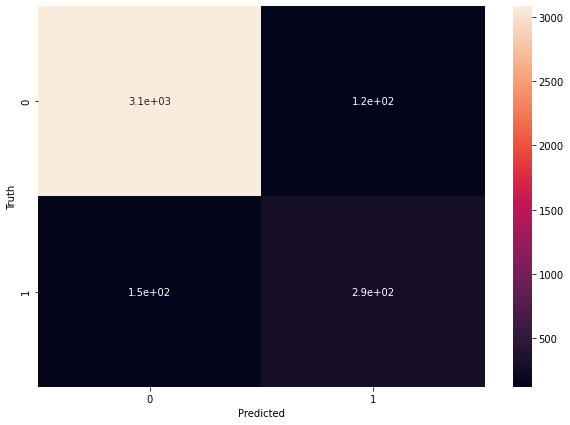

In [95]:
import seaborn as sn
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [96]:
print(classification_report(Y_test, Y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3203
           1       0.70      0.66      0.68       435

    accuracy                           0.93      3638
   macro avg       0.83      0.81      0.82      3638
weighted avg       0.92      0.93      0.93      3638



In [98]:
param_dist={
    "criterion":["gini","entropy"],
    "max_depth":[1,2,3,4,5,6,7,None]
}

In [99]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model,param_grid=param_dist,cv=5,n_jobs=-1)

n_jobs=-1 => to use all the cores of my processor to do this job. Ei job ta amr processor er shb core equally divide kore korbe.

In [100]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [101]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [102]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 7}

Criterion = entropy & max_depth=7 er jnno best score dibe.

In [103]:
grid.best_score_

0.9400251118685853